In [108]:
import pandas as pd

## Definindo nomes das colunas

O Dataset traz os nomes das colunas separados dos dados. Para fins de visualização, estes nomes são recuperados manualmente a seguir.

In [109]:
numeric_columns = [
    "Elevation",
    "Aspect",
    "Slope",
    "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Hillshade_9am",
    "Hillshade_Noon",
    "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points",
]

wilderness_area_columns = [
    "WA_Rawah",
    "WA_Neota",
    "WA_Comanche_Peak",
    "WA_Cache_la_Poudre"
]

soil_columns = []
for i in range(1,41):
    soil_columns.append("Soil_Type_{}".format(i))

column_names = numeric_columns + wilderness_area_columns + soil_columns + ["Cover_Type"]

print(column_names)
print("Total de colunas: " + str(len(column_names)))

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'WA_Rawah', 'WA_Neota', 'WA_Comanche_Peak', 'WA_Cache_la_Poudre', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40', 'Cover_Type']
Total de colunas: 55


## Carregando o dataset

In [110]:
pd.set_option('display.max_columns', None) # Mostra todas as colunas
#df = pd.read_csv('covtype.data', names=column_names)
df = pd.read_csv('covtype.data/covtype.data', names=column_names, nrows = 1000)
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,WA_Rawah,WA_Neota,WA_Comanche_Peak,WA_Cache_la_Poudre,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2982,10,18,30,7,4562,197,200,136,2538,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
996,3032,339,14,95,23,4710,189,219,169,518,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
997,2896,72,16,319,44,3294,236,208,98,2726,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
998,2846,135,2,0,0,3056,222,238,152,2349,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Desfazendo formatações
Como esse dataset já vinha com algumas formatações, como One Hot Enconding, fez-se necessário desfazer, de modo que possamos analisar os dados de maneira mais íntegra.

## Removendo One-Hot-Encondings(SoilType)

In [111]:
start_soil = 13
end_soil = 13 + 41
df['Soil_Type'] = (df.iloc[:, start_soil:end_soil] == 1).idxmax(1)

## Informações básicas sobre os atributos do dataset

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Elevation                           1000 non-null   int64 
 1   Aspect                              1000 non-null   int64 
 2   Slope                               1000 non-null   int64 
 3   Horizontal_Distance_To_Hydrology    1000 non-null   int64 
 4   Vertical_Distance_To_Hydrology      1000 non-null   int64 
 5   Horizontal_Distance_To_Roadways     1000 non-null   int64 
 6   Hillshade_9am                       1000 non-null   int64 
 7   Hillshade_Noon                      1000 non-null   int64 
 8   Hillshade_3pm                       1000 non-null   int64 
 9   Horizontal_Distance_To_Fire_Points  1000 non-null   int64 
 10  WA_Rawah                            1000 non-null   int64 
 11  WA_Neota                            1000 non-null   int64

## Formatando os nomes
Adicionando nomes na coluna de COVER_TYPE para melhor compreensão dos dados


In [112]:
def forest(x):
    if x==1:
        return 'Spruce/Fir'
    elif x==2:
        return 'Lodgepole Pine'
    elif x==3:
        return 'Ponderosa Pine'
    elif x==4:
        return 'Cottonwood/Willow'
    elif x==5:
        return 'Aspen'
    elif x==6:
        return 'Douglas-fir'
    elif x==7:
        return 'Krummholz'
    
df['Cover_Type'] = df['Cover_Type'].apply(lambda x: forest(x))
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,WA_Rawah,WA_Neota,WA_Comanche_Peak,WA_Cache_la_Poudre,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,Soil_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Aspen,Soil_Type_29
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Aspen,Soil_Type_29
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Lodgepole Pine,Soil_Type_12
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Lodgepole Pine,Soil_Type_30
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Aspen,Soil_Type_29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2982,10,18,30,7,4562,197,200,136,2538,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Spruce/Fir,Soil_Type_23
996,3032,339,14,95,23,4710,189,219,169,518,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Spruce/Fir,Soil_Type_30
997,2896,72,16,319,44,3294,236,208,98,2726,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Lodgepole Pine,Soil_Type_29
998,2846,135,2,0,0,3056,222,238,152,2349,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Spruce/Fir,Soil_Type_23


In [107]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,WA_Rawah,WA_Neota,WA_Comanche_Peak,WA_Cache_la_Poudre,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.000000,1000.000000,1000.0,1000.0,1000.000000,1000.0,1000.0,1000.0,1000.000000,1000.0,1000.00000,1000.000000,1000.000000,1000.0,1000.000000,1000.0000,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.000000,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.000000,1000.000000
mean,2867.562000,141.844000,11.262000,236.588000,30.960000,3351.210000,218.274000,225.41300,139.768000,3184.821000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001000,0.005000,0.0,0.0,0.173000,0.0,0.0,0.0,0.025000,0.0,0.04600,0.007000,0.049000,0.0,0.003000,0.1020,0.016000,0.0,0.0,0.0,0.0,0.433000,0.135000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002000,0.003000
std,173.698265,108.431135,6.022759,189.964572,37.223917,1678.140477,20.803984,14.61561,29.328763,1746.286039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031623,0.070569,0.0,0.0,0.378437,0.0,0.0,0.0,0.156203,0.0,0.20959,0.083414,0.215976,0.0,0.054717,0.3028,0.125538,0.0,0.0,0.0,0.0,0.495739,0.341895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044699,0.054717
min,2486.000000,0.000000,1.000000,0.000000,-45.000000,67.000000,115.000000,141.00000,28.000000,120.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
25%,2739.000000,56.000000,7.000000,85.000000,4.000000,1826.750000,207.750000,217.00000,121.000000,1831.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
50%,2900.000000,108.000000,10.000000,201.000000,20.000000,3470.000000,222.000000,227.00000,139.000000,2720.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
75%,2985.000000,228.000000,14.000000,342.000000,46.000000,4779.250000,232.000000,235.00000,159.000000,4754.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
max,3267.000000,359.000000,40.000000,997.000000,245.000000,6890.000000,254.000000,254.00000,240.000000,6853.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,1.000000,0.0,1.00000,1.000000,1.000000,0.0,1.000000,1.0000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000


## Análise exploratória visual
Vizualização da distribuição das colunas numéricas.

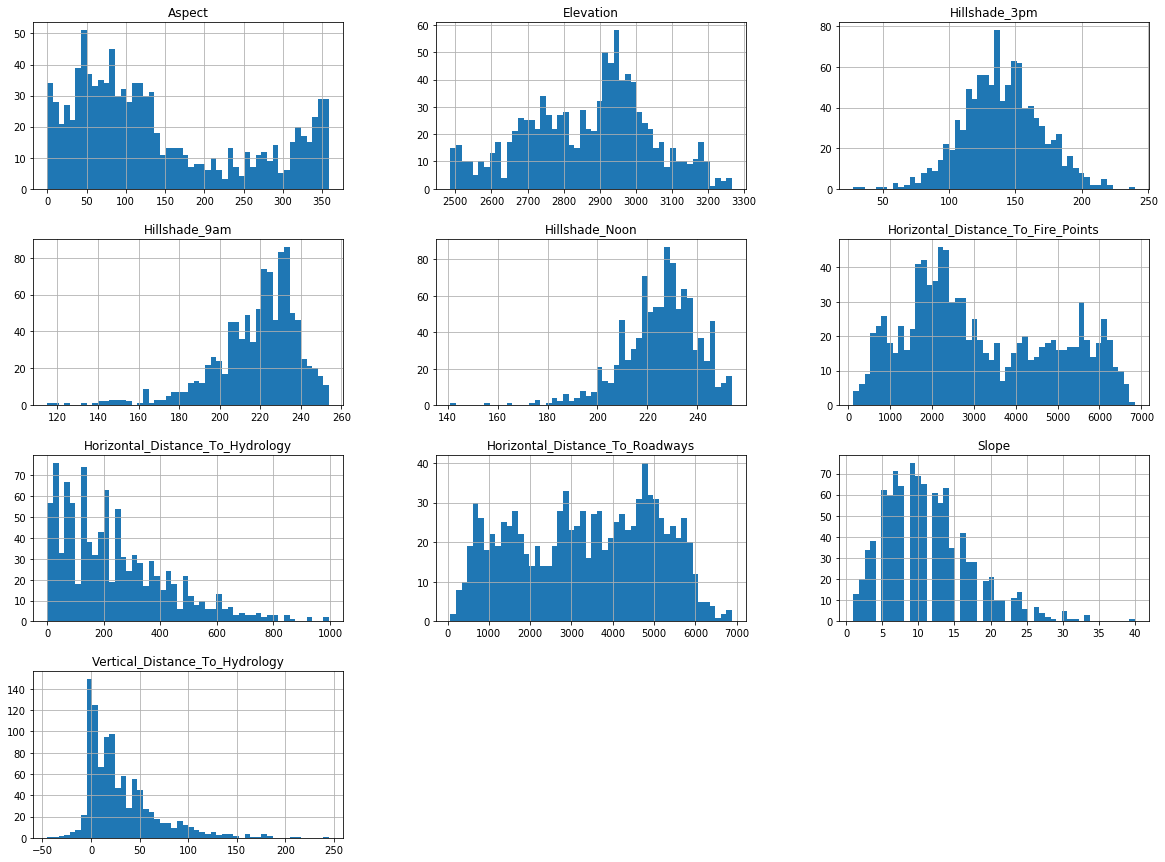

In [113]:
import matplotlib.pyplot as plt

df[numeric_columns].hist(bins=50, figsize=(20,15))
plt.show()

Para ter um maior domínio sobre o dataset, foi plottado alguns gráficos com a intenção de buscar relações que possam existir entre as colunas. Não foram plottados todos nesse momento, uma vez que isso será feito em um momento posterior, na seção de Correlações

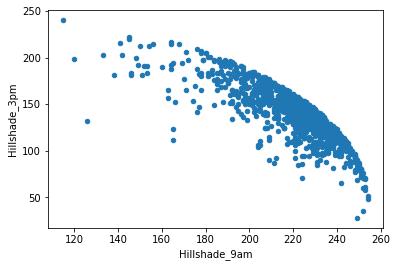

In [80]:
df.plot.scatter(x='Hillshade_9am', y='Hillshade_3pm')
plt.show()

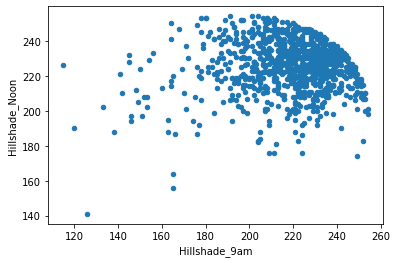

In [81]:
df.plot.scatter(x='Hillshade_9am', y='Hillshade_Noon')
plt.show()

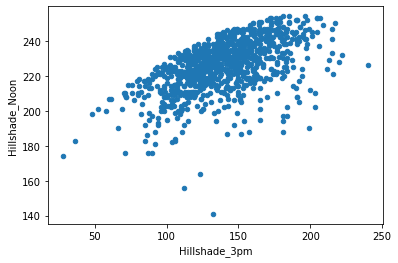

In [82]:
df.plot.scatter(x='Hillshade_3pm', y='Hillshade_Noon')
plt.show()

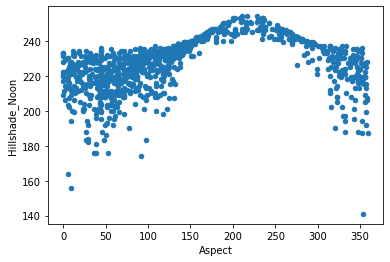

In [83]:
df.plot.scatter(x='Aspect', y='Hillshade_Noon')
plt.show()

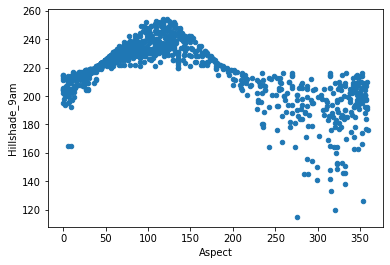

In [91]:
df.plot.scatter(x='Aspect', y='Hillshade_9am')
plt.show()

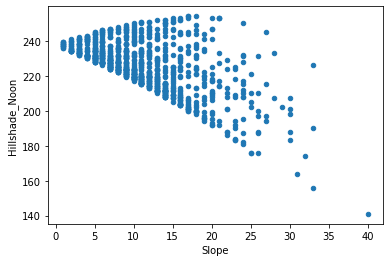

In [93]:
df.plot.scatter(x='Slope', y='Hillshade_Noon')
plt.show()

In [120]:
df.plot(x='Soil_Type', y='Cover_Type')
plt.show()

TypeError: no numeric data to plot

## Analisando as correlações entre as colunas numéricas

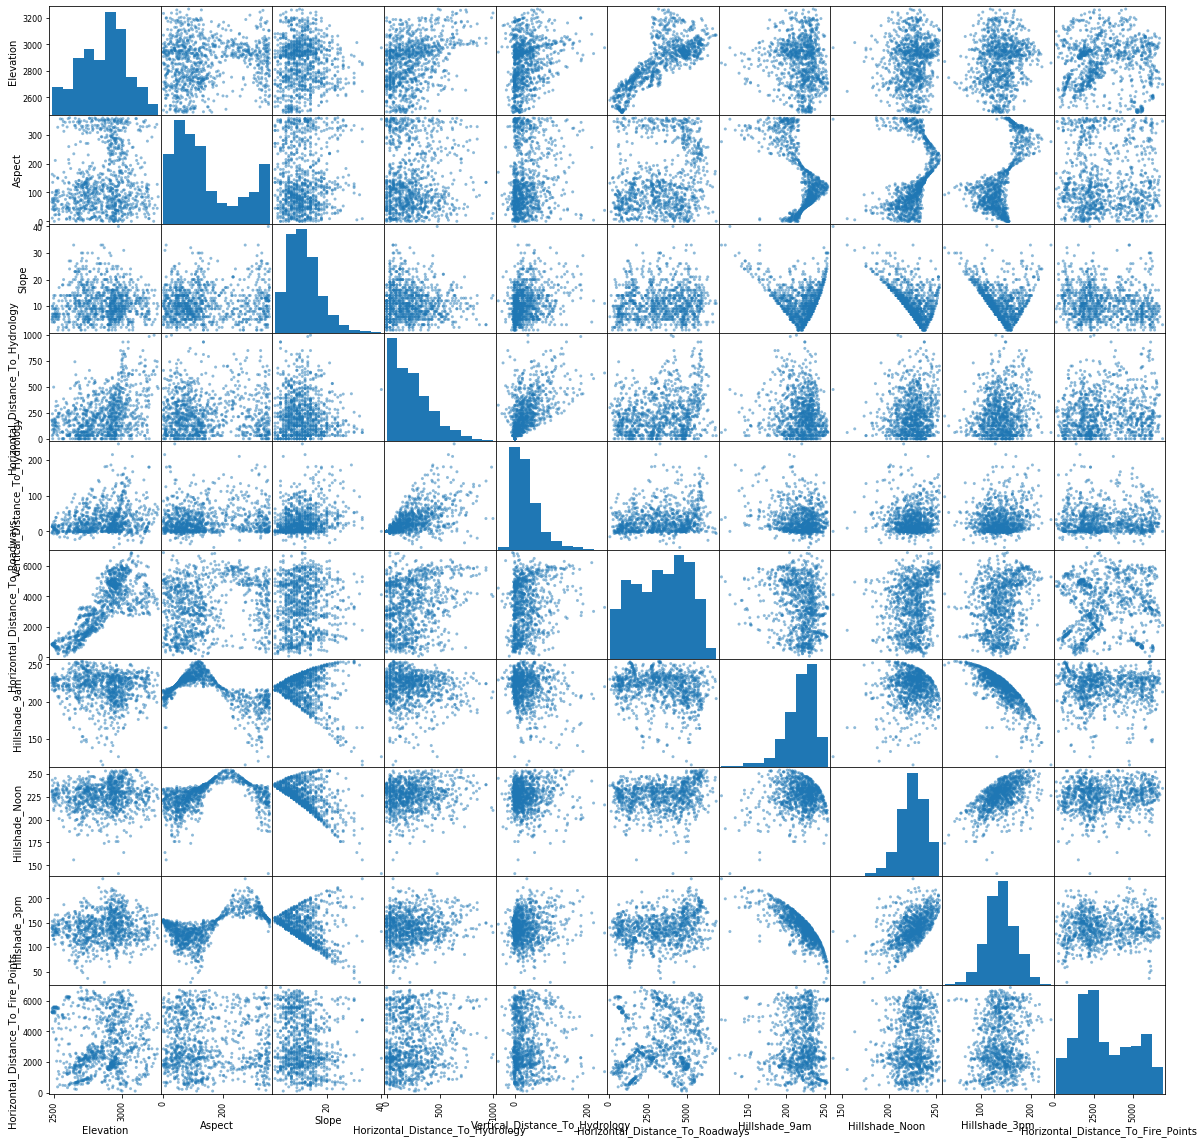

In [94]:
pd.plotting.scatter_matrix(df[numeric_columns],figsize=(20, 20))
plt.show()